In [134]:
%load_ext autoreload
%autoreload 2

import scripts.visualization as viz
viz.load_matplotlib()
plt = viz.plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
import pandas as pd
import seaborn as sns

def next_param(a: list, idx: int):
    return float(a[idx].split('=')[-1])

def load_results(path: str):
    a = path.split("/")[-1].split('_')[2:]
    beta = next_param(a, 0)
    gamma = next_param(a, 1)
    # kappa = next_param(a, 2)
    mu = next_param(a, 3)
    delta = next_param(a, 4)
    l = next_param(a, 5)
    xi = next_param(a, 6)
    n = float(a[7].split('=')[-1].split('e')[0])

    params = {r'\beta': beta, r'\gamma': gamma, r'\mu': mu,
              r'\delta': delta, r'\lambda': l, r'\xi': xi, 'n': n}
    return pd.read_csv(path, index_col=0), params

In [158]:
def plot_experiment1(res: pd.DataFrame, params: dict, vmin=0.15, vmax=0.30):
    ax = sns.heatmap(res, vmin=vmin, vmax=vmax)
    xlabels = [r'${:.2f}$'.format(float(s)) for s in list(res.columns)]
    ax.set_xticklabels(xlabels)
    ylabels = [r'${}$'.format(s) for s in list(res.index)]
    ax.set_yticklabels(ylabels)
    for item in ax.get_yticklabels():
        item.set_rotation(0)
    for item in ax.get_xticklabels():
        item.set_rotation(0)

    title = []
    counter = 1
    for k, v in params.items():
        t = r'${} = {}$'.format(k, v)
        if counter % 4 == 0:
            t += '\n'
        title.append(t)
        counter += 1
    plt.title(' '.join(title), )
    plt.xlabel('$p$')
    plt.ylabel('$q$')

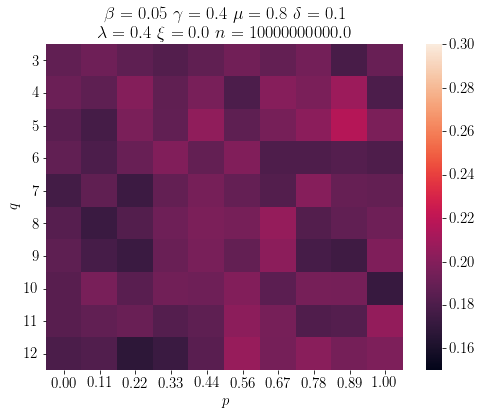

In [159]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=0_n=10000000000.0experiment1_small.csv")

plot_experiment1(res, params)

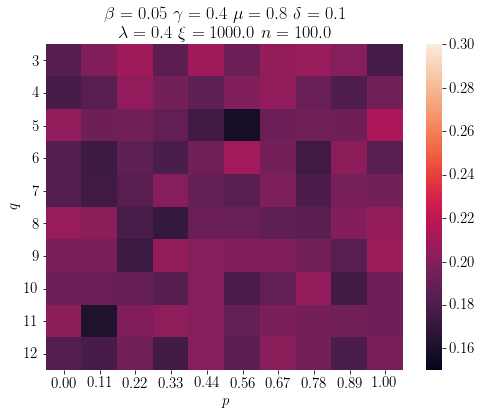

In [160]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.05_gamma=0.4_kappa=0.19999999999999996_mu=0.8_L2-delta=0.1_lambda=0.4_xi=1000_n=100.0experiment1_small.csv")

plot_experiment1(res, params)

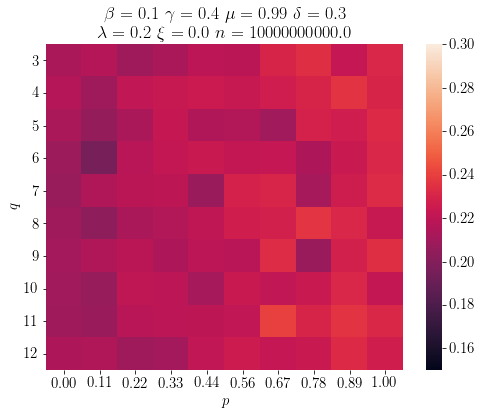

In [161]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.1_gamma=0.4_kappa=0.010000000000000009_mu=0.99_L2-delta=0.3_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

plot_experiment1(res, params)

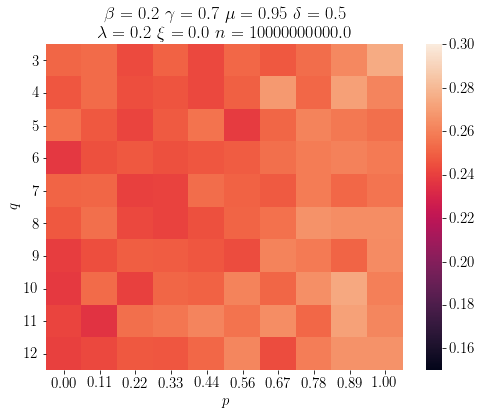

In [162]:
res, params = \
    load_results("../data/experiments/experiment1/dead_ratio_L1-beta=0.2_gamma=0.7_kappa=0.050000000000000044_mu=0.95_L2-delta=0.5_lambda=0.2_xi=0_n=10000000000.0experiment1_small.csv")

plot_experiment1(res, params)